# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [308]:
# builtin
import os, sys, time, random


# data
import pandas as pd
import numpy as np


# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import spacy


# ML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD , PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


# viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from wordcloud import WordCloud
from PIL import Image


# parallelisation
from pandarallel import pandarallel

## 1.3 downloads and options

In [310]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/alex/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [311]:
# init sns

sns.set()

In [312]:
# init pandarallel

pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## 1.4 Loading data

In [313]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv', 'unique_words.csv', 'min_5_words.csv']

In [314]:
# load dataframe

fn = data + 'df.csv'
df = pd.read_csv(fn)

In [315]:
df.head(2)

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38


# 2. Explore corpus and documents

##  2.1 20 random documents 

In [316]:
df_samp = df.sample(20)
df_samp

,text,target,_len_txt
5779,'Money can't buy happiness' is just a lie we t...,1,88
3780,wild night in the village of pugwash every fir...,1,135
874,@Lobo_paranoico Mad Men,0,23
5217,OH. #TeamHennessy #NJ Obliteration @tprimo24 ...,0,125
7518,CIA plot! *rolling eyes* RT @ajabrown: Chinese...,1,136
5264,Plains All American Pipeline company may have ...,1,132
6809,Rt hirochii0: There is no country that making ...,1,142
2719,(#LosDelSonido) Obama Declares Disaster for Ty...,1,137
2099,I feel like death,0,17
420,Bloor/Ossington arsonist also burned a mattres...,0,98


In [317]:
for idx, ser in df_samp.iterrows(): 

    txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
    print(txt_1+ser['text']+ "..." + "\n\n")

target : 1, len : 88
'Money can't buy happiness' is just a lie we tell poor people to keep them from rioting....


target : 1, len : 135
wild night in the village of pugwash every fire truck is out that the town has which is like a fire truck for every house -population:6...


target : 0, len : 23
@Lobo_paranoico Mad Men...


target : 0, len : 125
OH. #TeamHennessy #NJ Obliteration  @tprimo24 ROUND 1 Happy Birthday @djeddygnj Colombian FestivalÛ_ https://t.co/mRv54fiDfn...


target : 1, len : 136
CIA plot! *rolling eyes* RT @ajabrown: Chinese relatives of MH370 victims say reunion island wreckage was planted http://t.co/wmNb5ITa5P...


target : 1, len : 132
Plains All American Pipeline company may have spilled 40 percent more crude oil than previously estimated.... http://t.co/WEZjqC4Cf2...


target : 1, len : 142
Rt hirochii0: There is no country that making fun of Hiroshima 's tragedy but Korea. http://t.co/And1Btizao #Indonesia #Malaysia #Jamaica #Û_...


target : 1, len : 137
(#L

In [318]:
def print_sample(sub_df, n_samp=10) : 
    """print out n_samp documents from a corpus"""
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
        print(txt_1+ser['text']+ "..." + "\n\n")

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


target : 1, len : 135
SEVERE WEATHER BULLETIN #6
TROPICAL CYCLONE WARNING: TYPHOON 'HANNA' 
Issued at 11:00 p.m. Thursday 06 August... http://t.co/FQV47OB8gE...


target : 1, len : 129
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time...


target : 1, len : 46
@abcnews A nuclear bomb is a terrible weapon!!...


target : 1, len : 119
#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/xV3D9bPjHi #prebreak #best...


target : 1, len : 135
During the 1960s the oryx a symbol of the Arabian Peninsula were annihilated by hunters. 
http://t.co/yangEQBUQW http://t.co/jQ2eH5KGLt...


target : 1, len : 27
A country Chim can survive!...


target : 1, len : 89
...//..// whao.. 12000 Nigerian refugees repatriated from Cameroon http://t.co/baE0Ap4G9Y...


target : 1, len : 98
@RetiredFilth people in sydney woke up to the whole sky being red after a dust storm..like unreal....


ta

target : 0, len : 32
@MikeParrActor devastated!! ????...


target : 0, len : 33
I'm an emotional wreck right now....


target : 0, len : 140
This is a tragedy: I added the wrong book to my TBR list now I can't find the right one. This is what comes of browsing just on gr homepage....


target : 0, len : 140
.@uriminzok The coming catastrophe of the destruction of the puppet republic half naemolgo continue to firmly support. Yiraneuni and against...


target : 0, len : 62
KS except every character is Shizune.
The world would explode....


target : 0, len : 108
Remove the http://t.co/9Jxb3rx8mF and Linkury Browser Hijacker http://t.co/B5s5epJ7Um http://t.co/hPA9GQRyWa...


target : 0, len : 34
This real shit will damage a bitch...


target : 0, len : 62
you can stop panicking ?????? @ogtomd  https://t.co/ZvRE6fFNyD...


target : 0, len : 136
@accionempresa The U.S. Department of Commerce has been deluged the last two months with com... http://t.co/V1SFlLOWGh @gerenciatodos å¨...


target

## 2.2 work on a specific document

In [322]:
# select a random document

doc = df.text.sample(1)
doc = doc.values[0]
doc

'THANKS!!!!! @COUNT DANTE.  :)  DO JOIN US BY FOLLOWING THE @ANNIHILATION ZONE.  JOHNNY.'

In [323]:
# lower

doc = doc.lower()
doc

'thanks!!!!! @count dante.  :)  do join us by following the @annihilation zone.  johnny.'

In [324]:
# tokenize

tokens = word_tokenize(doc)
tokens

['thanks',
 '!',
 '!',
 '!',
 '!',
 '!',
 '@',
 'count',
 'dante',
 '.',
 ':',
 ')',
 'do',
 'join',
 'us',
 'by',
 'following',
 'the',
 '@',
 'annihilation',
 'zone',
 '.',
 'johnny',
 '.']

In [325]:
len(tokens)

24

In [326]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
tokens

['thanks',
 '!!!!!',
 '@',
 'count',
 'dante',
 '.',
 ':)',
 'do',
 'join',
 'us',
 'by',
 'following',
 'the',
 '@',
 'annihilation',
 'zone',
 '.',
 'johnny',
 '.']

In [327]:
len(tokens)

19

In [328]:
# stop_words

stop_words = set(stopwords.words('english'))
print(stop_words)

{'being', 'she', 'where', 'more', 'shan', 'no', 'once', 'o', 'from', 'out', 'didn', 'himself', 'themselves', 'mightn', 'shouldn', 'be', 'i', "don't", 'how', 'll', 'ain', 'other', "you'd", 'while', 'just', 'until', 'then', 'do', 'now', 'am', 'because', 'nor', 'our', 'wouldn', 't', 'the', 'wasn', "you're", 'haven', 'me', 'with', 'ma', "hadn't", 'doing', "needn't", 'aren', 'you', 'have', 'them', 'yourselves', 'off', 'under', "won't", 'did', 'can', "hasn't", 'doesn', 'hadn', "that'll", 'y', 'it', "should've", 'needn', 'same', "shouldn't", 'isn', 're', 'by', 'this', "haven't", 'my', "mustn't", 'about', 'there', 'some', 'all', 'won', 'in', "weren't", 'against', 'very', "wouldn't", "you've", 'will', 'whom', "you'll", 'as', "aren't", "isn't", 'further', 'don', 'these', 'its', 'should', 'those', 'which', 'between', 'herself', "couldn't", 'if', 'not', 'or', 'own', 'an', 'and', 'during', 'too', 'yours', 'your', 'such', 'm', "mightn't", 'are', "it's", 'down', 'having', 'theirs', 'here', 'so', 'but

In [329]:
tokens = [w for w in tokens if w not in stop_words]
tokens

['thanks',
 '!!!!!',
 '@',
 'count',
 'dante',
 '.',
 ':)',
 'join',
 'us',
 'following',
 '@',
 'annihilation',
 'zone',
 '.',
 'johnny',
 '.']

In [330]:
len(tokens)

16

In [331]:
# an other tokensizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
tokens

['thanks',
 'count',
 'dante',
 'do',
 'join',
 'us',
 'by',
 'following',
 'the',
 'annihilation',
 'zone',
 'johnny']

In [332]:
len(tokens)

12

In [333]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
tokens

['thanks',
 'count',
 'dante',
 'join',
 'us',
 'following',
 'annihilation',
 'zone',
 'johnny']

In [334]:
len(tokens)

9

In [335]:
def process_text_1(doc, rejoin=False) : 
    """basic function of text processing """
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [336]:
process_text_1(doc)

['thanks',
 'count',
 'dante',
 'join',
 'us',
 'following',
 'annihilation',
 'zone',
 'johnny']

## 2.3 working on corpus

### 2.3.1 build raw corpus

In [337]:
# join all corpus

raw_corpus = "".join(df.text.values)
raw_corpus[:5000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [338]:
# process the corpus

corpus = process_text_1(raw_corpus)
corpus

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [339]:
len(set(corpus))

22486

In [363]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

co             4740
http           4263
https           408
amp             344
like            343
               ... 
appalling         1
businessmen       1
jlwhaowfqa        1
saveti            1
ymy4rskq3d        1
Length: 22486, dtype: int64

In [364]:
# visualization

# sns.barplot(x=tmp.index, y=tmp.values)

In [365]:
# 30st most common tokens

tmp.head(30)

co           4740
http         4263
https         408
amp           344
like          343
û_            297
fire          234
get           226
via           219
2             204
people        194
new           183
one           181
news          167
disaster      148
emergency     146
video         138
would         135
body          127
police        123
still         121
3             120
burning       119
crash         117
u             117
us            115
storm         114
back          113
know          113
day           112
dtype: int64

In [366]:
# 30st last common tokens

tmp.tail(30)

sweated                1
drying                 1
gqpi7jmkan             1
sharethissouth         1
92                     1
88                     1
17000                  1
drrichardbesser        1
columbus               1
n8ezfctfcemichael      1
rowysolouisville       1
hxvfmouhdm             1
steveycheese99         1
mapmyrun               1
stung                  1
x6asgrjswcgot          1
transgender            1
mwlippert              1
southkorea             1
electrocutedboiling    1
waterfur               1
3a50dhz7yijust         1
50ft                   1
hairdryer              1
earths_voice           1
appalling              1
businessmen            1
jlwhaowfqa             1
saveti                 1
ymy4rskq3d             1
dtype: int64

In [367]:
tmp.describe()

count    22486.000000
mean         3.729343
std         43.687675
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4740.000000
dtype: float64

In [368]:
# sns.displot(tmp)

In [369]:
# sns.boxplot(tmp)

### list rare tokens

In [370]:
# unique words --> not usefull

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

x9cuihib5nfinnish    1
creatures            1
nukes                1
ys3nmwwyvc           1
pact                 1
stunckle             1
alpotnb7q3japan      1
restart              1
navygermany          1
40mln                1
construct            1
willie_am_i          1
0dxvz7fdh3a          1
cataclysmic          1
gpvzv0249yus         1
e9d9lk5fdwnuclear    1
promised             1
sy2whxt0k5           1
frkodestuknavy       1
rt_america           1
xkurdr3yevnuclear    1
melts                1
subsd                1
indo                 1
xn09mx6sxy           1
businessus           1
d8awx2okke           1
justthebottle        1
sizewell             1
reator               1
dtype: int64

In [371]:
len(list_unique_words)

16193

In [372]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['x9cuihib5nfinnish',
 'creatures',
 'nukes',
 'ys3nmwwyvc',
 'pact',
 'stunckle',
 'alpotnb7q3japan',
 'restart',
 'navygermany',
 '40mln',
 'construct',
 'willie_am_i',
 '0dxvz7fdh3a',
 'cataclysmic',
 'gpvzv0249yus',
 'e9d9lk5fdwnuclear',
 'promised',
 'sy2whxt0k5',
 'frkodestuknavy',
 'rt_america',
 'xkurdr3yevnuclear',
 'melts',
 'subsd',
 'indo',
 'xn09mx6sxy',
 'businessus',
 'd8awx2okke',
 'justthebottle',
 'sizewell',
 'reator']

In [373]:
# save it for later

tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("data/cleaned/unique_words.csv", index=False)

In [374]:
tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp<=5]
list_min_5_words[:30]

client         5
nation         5
commercial     5
gusts          5
conflict       5
roll           5
insane         5
extra          5
losing         5
rises          5
thats          5
responds       5
listening      5
teams          5
mother         5
purple         5
nuke           5
trolley        5
clip           5
battling       5
bounty         5
often          5
predicted      5
unsafe         5
served         5
dare           5
profit         5
exploration    5
english        5
looting        5
dtype: int64

In [375]:
len(list_min_5_words)

20275

In [405]:
tmp = pd.Series(corpus).value_counts()
list_min_10_words = tmp[tmp<=10]
list_min_10_words[:30]

philippin        10
mediterranean    10
sometim          10
understand       10
loos             10
wish             10
either           10
michael          10
social           10
return           10
quit             10
abl              10
tent             10
upset            10
ocean            10
kit              10
municip          10
seem             10
stuff            10
emot             10
amazon           10
weird            10
usual            10
abandon          10
radiat           10
main             10
ferguson         10
matter           10
spaceship        10
pictur           10
dtype: int64

In [406]:
len(list_min_10_words)

519

In [376]:
list_min_10_words = list(list_min_10_words.index)
tmp = pd.DataFrame({"words" : list_min_10_words})
tmp.to_csv("data/cleaned/min_10_words.csv", index=False)

### version 2

In [377]:
def process_text_2(doc, rejoin=False, list_rare_words=None, min_len_word=3) : 
    """cf process_text but with  list_unique_words and min_len_word"""
    
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N =  [w for w in non_rare_tokens if len(w) >= min_len_word  ]
    
    # only alpha chars
    alpha_tokens = [w for w in more_than_N if w.isalpha()]
    
    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [378]:
pd.Series(corpus).sample(30)

47316            longest
64826                  7
82232             wounds
63779    pspm3ahgkqvideo
58502     osi2016refugio
53049             thanks
82109              cause
41375                lie
25586            jobbing
79276        rjcaxjp4osi
1509                  co
25756              crash
79910        battlefield
55655               call
77723           upheaval
11058        firefighter
2824         exterminate
13536           arrested
2493               maybe
81778            fatally
36512            highway
72137               http
82151    idhj4jbq05crack
39551               http
24790      vtp8i8qlenthe
9311                date
7435        crystal_blaz
48161            patched
48324                 co
1657              debris
dtype: object

In [379]:
len(set(corpus))

22486

In [380]:
corpus = process_text_2(raw_corpus, list_rare_words=list_unique_words, rejoin=False)
pd.Series(corpus).sample(30)

32716        technica
3353         response
28558           first
3497              men
16216          debris
22043             get
38785        disaster
50953    thunderstorm
32308            http
6227            awful
33889        hostages
49520            like
51500         recount
20441           still
13181        estimate
2832           admits
3926            music
9185        buildings
40380        outbreak
23093             get
23675          behalf
52715             snd
48768         started
50564          threat
37472            http
25966          worked
2187            pbban
27092             old
11425         instead
39696           never
dtype: object

In [381]:
len(set(corpus))

5766

### version 3

In [382]:
def process_text_3(doc, rejoin=True, lemm_or_stemm = "stem", list_rare_words=None, min_len_word=3) : 
    """df v2 but with stemmer and lemmer"""
 
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop rare tokens
    non_rare_tokens_list = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_rare_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [383]:
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

33212          use
13822          idk
26447         guid
54555          one
29601         http
9296         middl
6356          http
23254         care
47135        bring
2370     apocalyps
29299         hail
40543    blizzhero
47013         shit
30620    firefight
33468          man
17029        worth
5259         bleed
22376         like
23227       counti
47325          war
43717       person
56020        major
36960       murder
39744         four
29136         drop
7745          http
41004        panic
29          school
5431          jazz
46153     brooklyn
dtype: object

In [384]:
len(set(corpus))

4472

In [385]:
pd.Series( words.words()).sample(30)

137533             paler
110903          Mandalay
139373         parchedly
3421              affeer
198519           tartana
85164        heterognath
79504           granulet
59951                 eh
128267              noun
227446       veinbanding
51682         derogative
163620            rawish
107086          lionlike
172588           sainted
215049        undiligent
208834          tubulate
86423            hoghide
123623      Nephropsidae
230287         Walpurgis
31676      cathartically
161419        quagginess
230083        wagonsmith
112693       meaningless
122483            narica
202011              they
184012           snocker
162051    quinquefarious
55786        dissentient
95350        insipiently
131578         oppugnant
dtype: object

### version 4

In [386]:
len(set( words.words()))

235892

In [279]:
eng_words = [i.lower() for i in words.words()]
eng_words

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'abassin',
 'abastardize',
 'abatable',
 'abate

In [281]:
len(set(eng_words))

234377

In [282]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
pd.Series(eng_words_stem).sample(30)

167798         resinoid
51231            depass
3179         aerobiolog
46250       cryptodoubl
11021            anywis
18568              bare
151253          portanc
219239        unmanipul
114163            merop
226545       vaccinogen
219708         unmurmur
189146            stele
109570    machinofactur
13810        arthrotomi
171637            rumbl
78525            godmak
160310         purparti
46659       cultrirostr
116749       miraculist
101836             khat
26278             brief
79935           gregari
155946        proattend
210651         umptieth
109877           madman
77333       gingivolabi
154877         presecur
73365          freehold
70213         firespout
42275        contravent
dtype: object

In [283]:
len(set(eng_words_stem))

178311

In [286]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
pd.Series(eng_words_lem).sample(30)

221212             unpursed
199409         telegraphone
115969          microzoaria
27514               bundeli
167465            repulsion
169259          rheotropism
90362         hyracotherian
175197            scirtopod
233866                 wyle
173885         satisfactory
3993                  agist
64564           erysipelous
216927            unfuddled
160242                pured
135671           overrusset
90250        hypothetically
132847       ostariophysial
58358               dullard
194138    superaccumulation
169219              rheebok
93196           incourteous
211624             unbating
199960           tenggerese
104570                laten
187828             spurling
57362            downcastly
101261               kasida
91454            imbricated
137373            palaverer
123421            neologize
dtype: object

In [287]:
len(eng_words_lem)

236736

In [387]:
def process_text_4(doc, rejoin=True, lemm_or_stemm = "stem", list_rare_words=None, min_len_word=3, eng_words=None) : 
    """df v3 but with only valid english word"""
 
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop rare tokens
    non_rare_tokens_list = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_rare_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
        
    #  return a list or a string
    if rejoin : 
        return " ".join(engl_text)
    
    return engl_text

In [389]:
corpus = process_text_4(raw_corpus, rejoin=False, list_rare_words=list_unique_words, eng_words=eng_words_stem)
corpus[:30]

['deed',
 'reason',
 'earthquak',
 'may',
 'allah',
 'forgiv',
 'fire',
 'near',
 'resid',
 'ask',
 'shelter',
 'place',
 'offic',
 'evacu',
 'shelter',
 'place',
 'order',
 'peopl',
 'receiv',
 'wildfir',
 'evacu',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfir',
 'school',
 'updat',
 'california',
 'close',
 'due',
 'lake',
 'counti',
 'fire',
 'wildfir',
 'flood',
 'disast',
 'heavi',
 'rain',
 'caus',
 'flash',
 'flood',
 'street',
 'colorado',
 'spring',
 'top',
 'hill',
 'see',
 'fire',
 'wood',
 'emerg',
 'evacu',
 'happen',
 'build',
 'across',
 'afraid',
 'tornado',
 'come',
 'area',
 'three',
 'peopl',
 'die',
 'heat',
 'wave',
 'south',
 'get',
 'flood',
 'hah',
 'wait',
 'second',
 'live',
 'south',
 'flood',
 'rain',
 'flood',
 'florida',
 'day',
 'lost',
 'count',
 'flood',
 'arriv',
 'school',
 'bu',
 'car',
 'crash',
 'break',
 'man',
 'love',
 'car',
 'ridicul',
 'london',
 'cool',
 'love',
 'wonder',
 'day',
 'way',
 'eat',
 'last',

In [390]:
len(set(corpus))

3479

In [391]:
len(df)

7613

In [397]:
list_unique_words[:30]

['x9cuihib5nfinnish',
 'creatures',
 'nukes',
 'ys3nmwwyvc',
 'pact',
 'stunckle',
 'alpotnb7q3japan',
 'restart',
 'navygermany',
 '40mln',
 'construct',
 'willie_am_i',
 '0dxvz7fdh3a',
 'cataclysmic',
 'gpvzv0249yus',
 'e9d9lk5fdwnuclear',
 'promised',
 'sy2whxt0k5',
 'frkodestuknavy',
 'rt_america',
 'xkurdr3yevnuclear',
 'melts',
 'subsd',
 'indo',
 'xn09mx6sxy',
 'businessus',
 'd8awx2okke',
 'justthebottle',
 'sizewell',
 'reator']

In [398]:
len(list_unique_words)

16193

In [399]:
list_min_5_words[:30]

['client',
 'nation',
 'commercial',
 'gusts',
 'conflict',
 'roll',
 'insane',
 'extra',
 'losing',
 'rises',
 'thats',
 'responds',
 'listening',
 'teams',
 'mother',
 'purple',
 'nuke',
 'trolley',
 'clip',
 'battling',
 'bounty',
 'often',
 'predicted',
 'unsafe',
 'served',
 'dare',
 'profit',
 'exploration',
 'english',
 'looting']

In [400]:
len(list_min_5_words)

20275

In [401]:
corpus = process_text_4(raw_corpus, rejoin=False, list_rare_words=list_min_5_words, eng_words=eng_words_stem)
corpus[:30]

['reason',
 'earthquak',
 'may',
 'allah',
 'fire',
 'near',
 'resid',
 'ask',
 'shelter',
 'place',
 'offic',
 'evacu',
 'shelter',
 'place',
 'order',
 'peopl',
 'wildfir',
 'evacu',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfir',
 'school',
 'updat',
 'california',
 'close',
 'due',
 'lake',
 'counti',
 'fire',
 'wildfir',
 'flood',
 'disast',
 'heavi',
 'rain',
 'caus',
 'flash',
 'flood',
 'street',
 'colorado',
 'top',
 'hill',
 'see',
 'fire',
 'emerg',
 'evacu',
 'happen',
 'build',
 'across',
 'tornado',
 'come',
 'area',
 'three',
 'peopl',
 'die',
 'heat',
 'wave',
 'south',
 'get',
 'wait',
 'second',
 'live',
 'south',
 'flood',
 'flood',
 'florida',
 'day',
 'lost',
 'flood',
 'arriv',
 'school',
 'bu',
 'car',
 'crash',
 'break',
 'man',
 'love',
 'car',
 'london',
 'cool',
 'love',
 'day',
 'way',
 'eat',
 'last',
 'week',
 'love',
 'like',
 'end',
 'market',
 'ablaz',
 'alway',
 'tri',
 'bring',
 'heavi',
 'metal',
 'break',
 'news'

In [402]:
len(set(corpus))

1461

In [403]:
tmp = pd.Series(corpus).value_counts()
tmp

like        403
amp         344
fire        342
get         307
bomb        230
           ... 
electron      6
nine          6
gotten        6
attent        6
touch         6
Length: 1461, dtype: int64

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

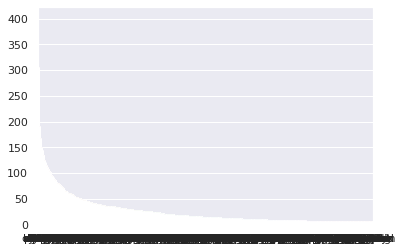

In [404]:
# sns.barplot(tmp.index, tmp.values)

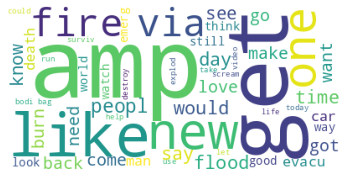

In [410]:
wordcloud = WordCloud(background_color = 'white', stopwords = [], max_words = 50).generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

## by category

In [414]:
df_1 = df[df.target == 1]
df_0 = df[df.target == 0]

In [415]:
corpus_1 = " ".join(df_1.text)
corpus_0 = " ".join(df_0.text)

In [416]:
corpus_1 = process_text_4(corpus_1, rejoin=False, list_rare_words=list_min_5_words, eng_words=eng_words_stem)
corpus_0 = process_text_4(corpus_0, rejoin=False, list_rare_words=list_min_5_words, eng_words=eng_words_stem)

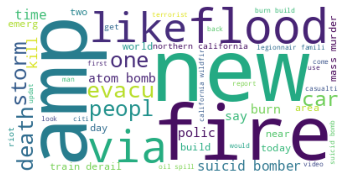

In [417]:
wordcloud = WordCloud(background_color = 'white', stopwords = [], max_words = 50).generate(" ".join(corpus_1))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

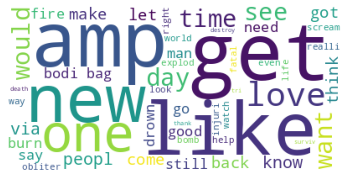

In [418]:
wordcloud = WordCloud(background_color = 'white', stopwords = [], max_words = 50).generate(" ".join(corpus_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [423]:
pd.Series(corpus_1).value_counts().head(20)

fire          272
bomb          186
kill          159
news          140
amp           135
via           121
disast        121
flood         118
california    115
suicid        112
dtype: int64

In [422]:
pd.Series(corpus_0).value_counts().head(20)

like    305
get     223
amp     209
new     170
one     137
love    119
bodi    119
bag     111
time    105
day     102
dtype: int64

In [425]:
[i for i in pd.Series(corpus_1).value_counts().head(10).index if i in pd.Series(corpus_0).value_counts().head(10).index]

['amp']

In [426]:
def process_text_5(doc, rejoin=True, lemm_or_stemm = "stem", list_rare_words=None, min_len_word=3, eng_words=None) : 
    """df v4 but exclude amp"""
 
    # list_unique_words
    if not list_rare_words: 
        list_rare_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop rare tokens
    non_rare_tokens_list = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_rare_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
       
    # amp
    engl_text = [i for i in engl_text if i!="amp"]
        
    #  return a list or a string
    if rejoin : 
        return " ".join(engl_text)
    
    return engl_text

In [430]:
def final_clean(doc) : 
    
    new_doc = process_text_5(doc,rejoin=True, stem_or_lem="lem", list_rare_words=list_min_5_words, eng_words=eng_words_lem)
    return  new_doc

In [431]:
df["clean_text"] = df.text.apply(final_clean)

In [485]:
df.isna().sum()

text          0
target        0
_len_txt      0
clean_text    0
dtype: int64

In [486]:
df

,text,target,_len_txt,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,69,reason earthquak may allah
1,Forest fire near La Ronge Sask. Canada,1,38,forest fire near canada
2,All residents asked to 'shelter in place' are ...,1,133,resid ask shelter place offic evacu shelter pl...
3,"13,000 people receive #wildfires evacuation or...",1,65,peopl wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo alaska smoke wildfir school
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83,two giant crane hold bridg collaps nearbi home
7609,@aria_ahrary @TheTawniest The out of control w...,1,125,control wild fire california even northern par...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,volcano
7611,Police investigating after an e-bike collided ...,1,137,polic investig bike collid car littl bike seri...


In [487]:
df.to_csv("data/cleaned/final_df.csv", index=False)